Capítulo 1

Train DataFrame shape: (159571, 8)

Train DataFrame Head:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Null values by column in train:
id               0
comment_text     0
toxic            0
severe_toxic     

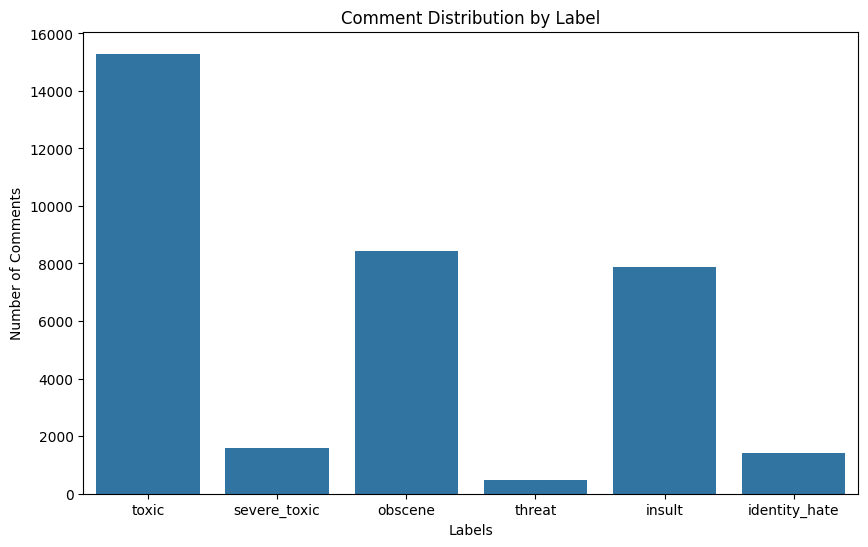

In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/train.csv')

print("Train DataFrame shape:", df.shape)

print("\nTrain DataFrame Head:")
print(df.head())

print("\nNull values by column in train:")
print(df.isnull().sum())

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print("\nLabel distribution in train:")
print(df[label_cols].sum().sort_values(ascending=False))

plt.figure(figsize=(10,6))
sns.barplot(x=df[label_cols].sum().index, y=df[label_cols].sum().values)
plt.title('Label distribution')
plt.title('Comment Distribution by Label')
plt.ylabel('Number of Comments')
plt.xlabel('Labels')
plt.show()

In [2]:
# Example comment
comment = df.loc[0, 'comment_text']
print("Example comment:\n", comment)

# Simple tokenization: split by whitespace
tokens = comment.split()
print("\nTokens:\n", tokens)
print(f"\nNumber of tokens in comment: {len(tokens)}")

Example comment:
 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Tokens:
 ['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan', 'were', 'reverted?', 'They', "weren't", 'vandalisms,', 'just', 'closure', 'on', 'some', 'GAs', 'after', 'I', 'voted', 'at', 'New', 'York', 'Dolls', 'FAC.', 'And', 'please', "don't", 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', "I'm", 'retired', 'now.89.205.38.27']

Number of tokens in comment: 43


In [3]:
# Tokenize all comments using split()
all_tokens = []
for text in df['comment_text']:
    all_tokens.extend(text.split())

total_tokens = len(all_tokens)
vocabulary = set(all_tokens)
num_types = len(vocabulary)

print(f"Total tokens in corpus: {total_tokens}")
print(f"Number of different tokens in corpus: {num_types}")

Total tokens in corpus: 10734904
Number of different tokens in corpus: 532299


In [4]:
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

def percentage(count, total):
    return 100 * count / total

# Lexical diversity of the entire corpus
div_global = lexical_diversity(all_tokens)
print(f"Global lexical diversity: {div_global:.4f}")

# Count of the word 'X' in the 
word = 'nigger'
count_toxic = all_tokens.count(word)
porc_toxic = percentage(count_toxic, total_tokens)
print(f"'{word}' appearances: {count_toxic} ({porc_toxic:.4f}% of corpus)")

Global lexical diversity: 0.0496
'nigger' appearances: 692 (0.0064% of corpus)


In [5]:
from nltk.text import Text
# Create a Text object from the list of tokens
text_nltk = Text(all_tokens)
# Show concordances with a word
text_nltk.concordance(word)

Displaying 25 of 3251 matches:
 warning then you fucking block me, nigger cunt eat pussy bitch Bob Parsons Th
ith its liberal defenders, FUCK YOU NIGGER OBOAMA! List of FNL awards and noms
ple. In my holy opinion, there is a nigger inside of all of us. People (like y
and mexicans try to compete with da nigger Gs but we r too strong. but in real
son, you suck. Stop being so white. Nigger pride. -(non-white person) " A case
 Are you a gay nigger? Then the Gay Nigger Association of America is right for
suggestions now. IN THE anus with a nigger dick in it.68.33.41.181 The use of 
 all for your input ) Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker Fan-1967 is a nigger licker Fan-1967 is a nigger licker 
67 is a nigger licker

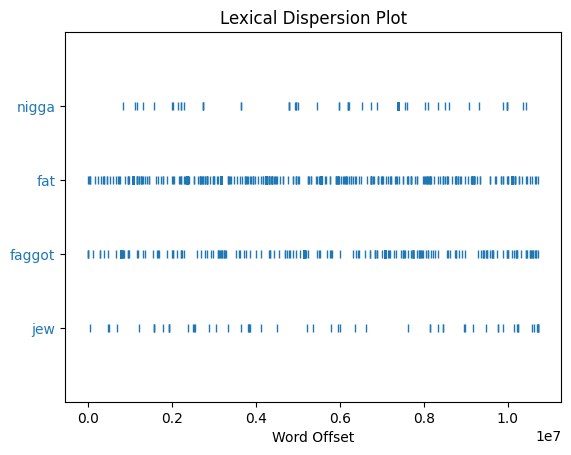

In [6]:
# Visualize trends of the usage of different words
environment = Text(all_tokens)
%matplotlib inline
environment.dispersion_plot(['nigga', 'fat', 'faggot', 'jew'])

In [7]:
# Sample comment and represent as a words list
comment1 = df.loc[0, 'comment_text']
print("Comment 1:", comment1)
# Simple tikenization: split by whitespace
tokens1 = comment1.split()
print(f"Tokens list (first 20): {tokens1[:20]}")

Comment 1: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Tokens list (first 20): ['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan', 'were', 'reverted?', 'They', "weren't", 'vandalisms,', 'just', 'closure', 'on', 'some']


In [8]:
# Lenght and count of a token
word = 'Hardcore'
print(f"Number of tokens in comment1: {len(tokens1)}")
print(f"Number of appearances of the word '{word}': {tokens1.count(word)}")

# List concatenation: join two comments
comment2 = df.loc[1, 'comment_text']
tokens2 = comment2.split()
print(f"Number of tokens in comment2: {len(tokens2)}")
tokens_concat = tokens1+tokens2
print(f"Combined number of comments: {len(tokens_concat)}")

# Append: add a final token
tokens1_copy = tokens1.copy()
tokens1_copy.append('<END>')
print(f"Last 5 tokens after append: {tokens1_copy[-5:]}")

Number of tokens in comment1: 43
Number of appearances of the word 'Hardcore': 1
Number of tokens in comment2: 17
Combined number of comments: 60
Last 5 tokens after append: ['since', "I'm", 'retired', 'now.89.205.38.27', '<END>']


In [9]:
# Get the token at a specific position (e.g., position 10)
if len(tokens1) > 10:
    print(f"Token on the 10th position: {tokens1[10]}")

# Find the index of the first occurrence of 'toxic' in tokens_concat
pat = 'Fan'
if pat in tokens_concat:
    idx = tokens_concat.index(pat)
    print(f"First occurrence of '{pat}' in tokens_concat on the index: {idx}")

# Slicing: obtain a window of 5 tokens alongside this position
    start = max(idx - 2, 0)
    end = idx + 3
    print(f"Context alongside '{pat}': {tokens_concat[start:end]}")

Token on the 10th position: Fan
First occurrence of 'Fan' in tokens_concat on the index: 10
Context alongside 'Fan': ['Hardcore', 'Metallica', 'Fan', 'were', 'reverted?']


In [10]:
# Save types and token counts as variables
total_tokens = len(tokens_concat)
distinct_types = len(set(tokens_concat))

print(f"Total tokens combined: {total_tokens}")
print(f"Number of diferent types in tokens_concat: {distinct_types}")

Total tokens combined: 60
Number of diferent types in tokens_concat: 57


In [11]:
# Take the first token of the list and string operations
word = tokens1[0] if tokens1 else ''
print(f"First token: {word}")

# Character indexing 
if len(word) >= 1:
    print(f"First character of '{word}': {word[0]}")

# Slicing of string
print(f"First 4 characters of '{word}': {word[:4]}")

# Multiply and concatenate strings
print(f"Duplicate {word}: {word * 2}")
print(f"Add exclamation: {word + '!'}")

# Join the tokens into a single string and split again
joined = ' '.join(tokens1[:10])
print(f"Joined (first 10 tokens): {joined}")
print(f"Split again: {joined.split()}" )

First token: Explanation
First character of 'Explanation': E
First 4 characters of 'Explanation': Expl
Duplicate Explanation: ExplanationExplanation
Add exclamation: Explanation!
Joined (first 10 tokens): Explanation Why the edits made under my username Hardcore Metallica
Split again: ['Explanation', 'Why', 'the', 'edits', 'made', 'under', 'my', 'username', 'Hardcore', 'Metallica']


In [12]:
from nltk.probability import FreqDist

dist_freq = FreqDist(all_tokens)
print(dist_freq)

# Print the 20 most common tokens
print(dist_freq.most_common(20))

# Frequency of token 'nigger'
word = 'nigger'
print(f"Apariciones de '{word}': {dist_freq[word]}")

<FreqDist with 532299 samples and 10734904 outcomes>
[('the', 445987), ('to', 288817), ('of', 219334), ('and', 207381), ('a', 201817), ('I', 183930), ('is', 164639), ('you', 157272), ('that', 140545), ('in', 130262), ('for', 96010), ('it', 92651), ('on', 84453), ('not', 83944), ('"', 81755), ('be', 80928), ('this', 71429), ('have', 69414), ('as', 68345), ('are', 66277)]
Apariciones de 'nigger': 692


In [13]:
hapaxes = dist_freq.hapaxes()
print(f"Number of hapaxes: {len(hapaxes)}")
print(f"Hapaxes examples: {hapaxes[:20]}")

Number of hapaxes: 348064
Hapaxes examples: ['now.89.205.38.27', "D'aww!", 'Wikipedia:Good_article_nominations#Transport', 'Shirvington', 'article(wow', "'animal", "breeding'", 'eugenics?', 'it-maybe', 'phone?', 'TALIBANS...who', '(non)-contribution', 'itself-making', 'relevant-this', 'ex-president', 'aircracft', 'liberally.', 'Yvesnimmo.', 'Santanas', 'Diplomats.']


In [14]:
# Words from the vocabulary with more than 15 characters
vocab = set(all_tokens)
long_words = [w for w in vocab if len(w) > 15]
print(sorted(long_words[:10]))

# Words with > 7 lenght and frequency
freq_longs = sorted(w for w in vocab if len(w) > 7 and dist_freq[w] > 7)
print(freq_longs[:10])

['5332480249395064', ':Image:Bahonar.jpg', 'ShaikhChandScan.jpg.', 'Template:Moogfest', "[[Wikipedia:Bot_owners'_noticeboard#API_BREAKING_CHANGE:_Default_continuation_mode_for_action.3Dquery_will_change_at_the_end_of_this_month|this", 'closes.149.254.58.10', 'errors/grammatical', 'eyesaggressively', 'http://de.wikipedia.org/w/index.php?title=Wikipedia:Benutzersperrung/Hans_Bug&oldid;=11470758', 'http://www.articletogo.com/articledetail.php?artid=88670&catid;=1&title;=Vedique+Goes+Online-00-1518,']
['!align=""center""', '!style=""background:', '""...and', '""...the', '""According', '""African', '""Alexander', '""Allegations', '""Alternative', '""Although']


In [15]:
from nltk import bigrams

# Example of bigrams on the first comment
tokens_ej = tokens1[:10]
print(list(bigrams(tokens_ej)))

# Collocations on the full corpus
text_nltk.collocations()

[('Explanation', 'Why'), ('Why', 'the'), ('the', 'edits'), ('edits', 'made'), ('made', 'under'), ('under', 'my'), ('my', 'username'), ('username', 'Hardcore'), ('Hardcore', 'Metallica')]
talk page; Thank you.; NIGGER NIGGER; talk page.; PIG PIG; JEW FAT;
FAT JEW; LOL LOL; speedy deletion; four tildes; Bark Bark; would like;
speedy deletion,; fair use; WANKER WANKER; fish fish; five pillars;
talk page,; tildes (~~~~);; BALLS BALLS


In [16]:
# Create FreqDist of the tokens lenght
fd_len = FreqDist(len(w) for w in all_tokens)

# 10 most common sizes
print(fd_len.most_common(10))

# Most frequent word size and its frequency
max_len = fd_len.max()
print(f"Most common lenght: {max_len} ({fd_len[max_len]} tokens)")
print(f"Lenght proportion {max_len}: {fd_len.freq(max_len):.4f}")

[(3, 1996396), (4, 1813981), (2, 1754160), (5, 1137058), (6, 863858), (7, 819354), (8, 601516), (1, 588287), (9, 424726), (10, 291447)]
Most common lenght: 3 (1996396 tokens)
Lenght proportion 3: 0.1860


In [17]:
# Select short tokens (less than 4 characters) in an example comment
short_tokens = [w for w in tokens1 if len(w) < 4]
print(f"Tokens with length < 4: {short_tokens}")

# Select tokens with length exactly 4
tokens_eq4 = [w for w in tokens1 if len(w) == 4]
print(f"Tokens with length == 4: {tokens_eq4}")

# Select tokens with length different from 4
tokens_not4 = [w for w in tokens1 if len(w) != 4]
print(f"Tokens with length != 4 (first 10): {tokens_not4[:10]}")

Tokens with length < 4: ['Why', 'the', 'my', 'Fan', 'on', 'GAs', 'I', 'at', 'New', 'And', 'the', 'the', "I'm"]
Tokens with length == 4: ['made', 'were', 'They', 'just', 'some', 'York', 'FAC.', 'from', 'talk', 'page']
Tokens with length != 4 (first 10): ['Explanation', 'Why', 'the', 'edits', 'under', 'my', 'username', 'Hardcore', 'Metallica', 'Fan']


In [18]:
# Tokens starting with cappital letter (istitle)
tokens_title = [w for w in set(all_tokens) if w.istitle()]
print(f"Tokens with tittle (istitle), examples: {tokens_title[:20]}")

# Tokens with digits (isdigit o any)
tokens_digits = [w for w in set(all_tokens) if w.isdigit()]
print(f"NUmeric tokens: {tokens_digits}")

# Alphanumeric tokens (isalpha)
tokens_alpha = [w for w in set(all_tokens) if w.isalpha()]
print(f"Number of alphanumeric tokens: {len(tokens_alpha)}")

Tokens with tittle (istitle), examples: ['Kozaks', "'Commonly'", 'Soccorondo,', 'Template:Moogfest', 'Why?87.36.25.39', 'Kanada.', '(Law)', 'Talk:Northeast', 'Hasnain..', 'Mannanan51"', 'Generators', 'Obese', '1(Doubleday', 'Dihydrogen', 'Petrine', '[Grizane],', 'Looney', 'H9332', 'Carlyn', 'Nananananana!"']
NUmeric tokens: ['510', '5332480249395064', '1867', '151', '5800', '650', '933', '327', '79', '1532', '678', '5569', '750', '3627', '322', '620', '162', '271828182', '33333333333333333333333333333333333333333333333333333333333333333333333333333', '12', '550678046', '01384402728', '00033', '0873488245', '1771', '286', '1632', '113', '203', '1326', '1832', '956', '1356', '1219', '424', '573', '1984', '78350', '864', '1774', '126', '1747', '235', '1968', '252', '9780781732819', '454', '0127', '370', '1856', '393', '870', '10017', '1828', '1900', '1817', '53', '1261', '2844', '1517', '1652', '000', '1781', '1767', '1325', '475', '10032', '1942', '1060', '489', '10628', '170', '613', '2

In [19]:
sub = 'nigger' 
count_sub = 0
for w in all_tokens:
    if sub in w.lower():
        count_sub += 1
print(f"Tokens with '{sub}' (case-insensitive): {count_sub}")

# Print tokens ending with
sub = 'ing'
printed = 0
for w in all_tokens:
    if w.lower().endswith(sub):
        print(w, end=' ')
        printed += 1
        if printed >= 20:
            break
print() 

Tokens with 'nigger' (case-insensitive): 3532
trying removing talking formatting tidying formatting intending anything requesting breeding uploading being using checking clicking selecting lacking uploading adding licensing 


In [20]:
# Clasify tokens based on type: digit, alphabetic or mixed
for w in set(tokens1):
    if w.isdigit():
        print(f"{w} is numeric")
    elif w.isalpha():
        print(f"{w} is alphabetic")
    else:
        print(f"{w} is mixed")

my is alphabetic
Why is alphabetic
I is alphabetic
Fan is alphabetic
made is alphabetic
please is alphabetic
on is alphabetic
page is alphabetic
weren't is mixed
reverted? is mixed
were is alphabetic
And is alphabetic
at is alphabetic
New is alphabetic
username is alphabetic
vandalisms, is mixed
Metallica is alphabetic
under is alphabetic
remove is alphabetic
York is alphabetic
since is alphabetic
Dolls is alphabetic
from is alphabetic
some is alphabetic
Hardcore is alphabetic
They is alphabetic
don't is mixed
I'm is mixed
talk is alphabetic
now.89.205.38.27 is mixed
just is alphabetic
voted is alphabetic
the is alphabetic
retired is alphabetic
template is alphabetic
edits is alphabetic
Explanation is alphabetic
FAC. is mixed
closure is alphabetic
after is alphabetic
GAs is alphabetic
